<a href="https://colab.research.google.com/github/Shrunkhala10/Shrunkhal_Kittur/blob/main/Outfit__Recommender__system__Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
from keras.models import Sequential

Importing essential libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D #Using maxpool to reduce the dimensions of the feature maps
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import cv2
import random

 ***Prepare Dataset for Training***
 *Preparing our dataset for training will involve assigning paths and creating categories(labels), resizing our images.*

In [ ]:
path_test = "/content/drive/MyDrive/FashionDataset/Shrunkhala/images"

*Resizing images to 200x200*

In [ ]:
category_colors = ["green", "red", "black", "blue", "purple"]
img_size = 200

***Creating a training dataset***
*Training is an array that will contain image pixel values and the index at which the image in the CATEGORIES list.*
*Creating an empty dataset*

In [ ]:
training_data = []

In [ ]:
for category in category_colors:
  path = os.path.join(path_test, category)
  class_num = category_colors.index(category)
  for img in os.listdir(path):
    print("resizing image {} in folder {}".format(img, category))
    img_array  = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (img_size , img_size))
    training_data.append([new_array, class_num])

resizing image 59875.jpg in folder green
resizing image 27895.jpg in folder green
resizing image 43910.jpg in folder green
resizing image 20137.jpg in folder green
resizing image 25527.jpg in folder green
resizing image 59874.jpg in folder green
resizing image 37949.jpg in folder green
resizing image 6969.jpg in folder green
resizing image 19724.jpg in folder green
resizing image 13452.jpg in folder green
resizing image 21157.jpg in folder green
resizing image 41385.jpg in folder green
resizing image 21155.jpg in folder green
resizing image 43631.jpg in folder green
resizing image 18884.jpg in folder red
resizing image 18749.jpg in folder red
resizing image 18923.jpg in folder red
resizing image 33543.jpg in folder red
resizing image 13936.jpg in folder red
resizing image 43630.jpg in folder red
resizing image 11724.jpg in folder red
resizing image 44655.jpg in folder red
resizing image 7139.jpg in folder red
resizing image 5127.jpg in folder red
resizing image 27856.jpg in folder red


displaying listing data

In [ ]:
training_data

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254

***Shuffling the dataset***

In [ ]:
random.shuffle(training_data)

***Assigning Labels and Features***
*This shape of both the lists will be used in Classification using the neural network*s

In [ ]:
X = []
y = []

In [ ]:
for features , label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
X = np.array(X).reshape(-1 , img_size , img_size , 3)
y = np.array(y)

***Normalising X and converting labels to categorical data***
It is the process of grouping similar values into one common value(x)it ensures both +ve and-ve values as input for next layer.
categorial data helps evaluate our model.

In [ ]:
X = X.astype('float32')
X /= 255

Converting to Categorical

In [ ]:
from keras.utils import np_utils

In [ ]:
Y = np_utils.to_categorical(y, 5)

In [ ]:
print(Y[100])


[0. 0. 1. 0. 0.]


***Split X and Y for use in CNN***
It is done to avoid overfitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

 ***Define, compile and train the CNN Model***
 Using tensorflow,import matplotlip,create a convolutional base adding dense layer on top compile and then train the model.

In [ ]:
batch_size = 16
nb_classes =5
nb_epochs = 20
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5,  activation=tf.nn.softmax)
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/20
9/9 [==============================] - 8s 815ms/step - loss: 7.4542 - accuracy: 0.2030 - val_loss: 1.5825 - val_accuracy: 0.2353
Epoch 2/20
9/9 [==============================] - 7s 784ms/step - loss: 1.5259 - accuracy: 0.3383 - val_loss: 1.5587 - val_accuracy: 0.3529
Epoch 3/20
9/9 [==============================] - 9s 1s/step - loss: 1.4178 - accuracy: 0.4812 - val_loss: 1.6212 - val_accuracy: 0.2941
Epoch 4/20
9/9 [==============================] - 7s 779ms/step - loss: 1.3534 - accuracy: 0.4511 - val_loss: 1.4124 - val_accuracy: 0.3235
Epoch 5/20
9/9 [==============================] - 7s 769ms/step - loss: 1.1522 - accuracy: 0.5639 - val_loss: 1.5091 - val_accuracy: 0.4118
Epoch 6/20
9/9 [==============================] - 7s 780ms/step - loss: 1.1259 - accuracy: 0.6316 - val_loss: 1.4686 - val_accuracy: 0.4118
Epoch 7/20
9/9 [==============================] - 7s 782ms/step - loss: 0.9634 - accuracy: 0.6767 - val_loss: 1.3928 - val_accuracy: 0.4706
Epoch 8/20
9/9 [=======

***Accuracy and Score of model***
Model accuracy score represents the model’s ability to correctly predict both the positives and negatives out of all the predictions.

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  1.6512130498886108
Test accuracy:  0.44117647409439087


***Giving an path for sample testing***

1/1 [==============================] - 0s 37ms/step


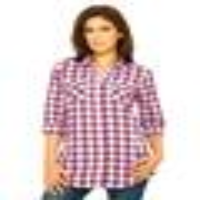

In [ ]:
sample_img_path = '/content/drive/MyDrive/FashionDataset/Shrunkhala/images/red/11018.jpg'
sample_img = cv2.imread(sample_img_path)
new_img = cv2.resize(sample_img, (img_size , img_size))
mylist = []
mylist.append(new_img)
mylist = np.array(mylist).reshape(-1 , img_size , img_size , 3)
model.predict(mylist)
from google.colab.patches import cv2_imshow
cv2_imshow(new_img)

***Predicting and recommending nearest 4 images from your dataset***

1/1 [==============================] - 0s 35ms/step


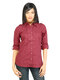

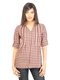

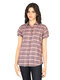

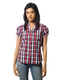

In [ ]:
predicted = model.predict(mylist)
mlist = predicted.tolist()

for i in range(5):
  if mlist[0][i] == 1.0:
    dir = os.listdir(os.path.join(path_test,category_colors[i]))
    count =0
    for j in dir :
      count += 1
      if(count >=5):
        break
      narr = cv2.imread(os.path.join(os.path.join(path_test,category_colors[i]), j))
      cv2_imshow(narr)

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))